In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

Progression of performance coefficient should generally decline with respect to time as player gets tired 

In [109]:
NUM_DATAPOINTS = 100000
PERF_QUOTIENT_DEGRADATION_RATE = 0.02

In [110]:
# Approximate performanceQuotient to be normally distributed

startingQuotients = np.clip(np.random.normal(loc=0, scale=0.5, size=NUM_DATAPOINTS), -0.9, 0.9)

def generalProgressFunc(quotient):
  return np.clip(quotient - PERF_QUOTIENT_DEGRADATION_RATE, -1, 1)


def getNextProgressWithNoise(quotient):
  noise = np.random.normal(loc=0, scale=0.04, size=len(quotient))
  return np.clip(generalProgressFunc(quotient) + noise, -1, 1)

In [111]:
# Time series of 10 consecutive games 
series = []
currQuotients = startingQuotients

for _ in range(10):
  currQuotients = getNextProgressWithNoise(currQuotients)
  series.append(currQuotients)
  
series = np.array(series)

In [112]:
print(series.shape)
series = series.transpose()

(10, 100000)


In [113]:
np.savetxt('data.csv', series, delimiter=',')

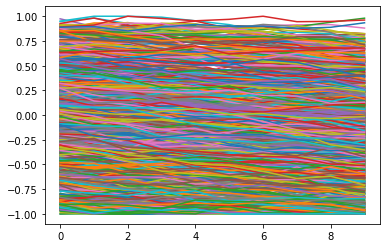

In [114]:
for line in series[1000:2000]:
  plt.plot(line)
  
plt.show()